<h4 style="text-align: right"> Submission by : Raghu Murugankutty  &nbsp;&nbsp;&nbsp;&nbsp;     Student ID: W20024451</h4>
<h4 style="text-align: right"> DataSet Used : 2018subsetCrimes, LSOA_Population</h4>

<h2 style="text-align: center">Crime pattern Analysis</h2>

<h1>INTRODUCTION</h1>



<h4>Problem statement</h4>
<p> In the television documentary “Ross Kemp and the Armed Police” broadcast on 6th September 2018 by ITV, 
multiple claims were made regarding violent crime in the UK. </p>

These claims were:
1.	Violent Crime is increasing
2.	There are more firearms incidents per head in Birmingham than anywhere else in the UK
3.	Crimes involving firearms are closely associated with drugs offenses 

In this assignment I will be investigating the above claims are true or not.

<p><h4>Approach taken to the problem</h4><p>
By using a real, the publicly available data set used:<b>2018subsetCrimes.</b> In this investigation process, I am using data processing framework Apache Spark and various, <b>python distributions</b> Pyspark,visualization(seaborn,Pandas),statistics(matplotlib),machine(matplotlib) learning methods and various frameworks.

<b>DataSet Used:</b> 2018subsetCrimes, LSOA_Population.

<b>Tools used </b>
Pyspark using RDD's,
Pyspark using SparkSQL,
Pyspark using Dataframes and Pandas.

<b>Frameworks used </b>
pandas,
matplotlib,
seaborn.

<b>Programming languages used</b>
python,
SQL.

<b>Environment</b>
Jupyter notebook, Pyspark.

<b>Styling:</b> Markdown.

<p>In certain parts of the following analysis, the code has been intentionally split into separate individual cells (where it could've been in a single cell) to explain the process more clearly. 
Similarly in certain parts, the code was intentionally grouped together.Irrelevant data regarding the problem statements are removed intentionally from the data set.<p>

<p>By the end of this analysis, we will have a conclusion about the above mentioned claims such as violent crimes increasing or not, firearm incident rates in Birmingham, the relationship between drugs and firearm crimes.<p>


<h3>Importing Libraries and environment setting<h3>

import pyspark
from pyspark import SparkContext, SparkConf

<p>Importing python libraries and dependencies <p> 
    <b>Constructs a connection to Spark execution environment</b>

In [2]:
import numpy as np
from pyspark.mllib.stat import Statistics

Importing Statistics libraries from mllib for statistical calculations

In [3]:
import matplotlib.pylab as plt
from matplotlib import pyplot

Importing plotting libraries for visualizations

import pandas as pd
from pyspark.sql import SQLContext
<b>sqlCtx = SQLContext(sc)</b>

<p> Here we're importing SQL Context which will enable us to make the table be available for the use of SQL Queries <p>
<p> The above Code is to setup the code prerequesites for our analysis<p>
<p> Here we also set Spark Context into <b>"sc"</b><p>

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

<h3>Data Loading<h3>

<p>Loading file from local file system, using <b>sc.textfile()</b>, and checking wether file loaded properly by using <b>lines.take()</b><p>

In [6]:
lines = sc.textFile("file:///Users/alanj/Desktop/2018SubsetCrime1.csv")
lines.take(5)

['Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category',
 ',2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497168,51.410029,On or near Fairacres Close,E01014403,Bath and North East Somerset ,Anti-social behaviour,',
 ',2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502878,51.406282,On or near Dunster Road,E01014404,Bath and North East Somerset ,Anti-social behaviour,',
 ',2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.503825,51.407447,On or near Amberley Close,E01014404,Bath and North East Somerset ,Anti-social behaviour,',
 '14f6a950aa505dc67b86c5f68aa7cdb1d75b237915788ce1b0e8ab566320274e,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.488407,51.405534,On or near Hurn Lane,E01014397,Bath and North East Somerset ,Violence and sexual offences,Investigation complete; no suspect identified']

<h3>Component Selection and Data Pipeline Implementation<h3>

In [ ]:
def parseline2(line):
    fields = line.split(',')
    CrimeID = fields[0]
    Month = fields[1]
    ReportedBy = fields[2]
    FallsWithin = fields[3]
    Longitude = fields[4]
    Latitude = fields[5]
    Location = fields[6]
    LSOAcode = fields[7]
    LSOAname = fields[8]
    CrimeType = fields[9]
    LastOutcomeCategory = fields[10]
    return (CrimeID,Month,ReportedBy,FallsWithin,Longitude,Latitude,Location,LSOAcode,LSOAname,CrimeType,LastOutcomeCategory)

<p> In the above code we're defining a parseline2 function and passing the argument <b>line.</b> By using parseline function, conerting CSV data in to python objects.<p>
<p><b>fields = line.split(',')</b> will split all the records into readable rows and columns<p>
<p> the rest of the line will read each attribute in our dataset and assign them to a particular field <p>

In [8]:
header = lines.first() 
justdata = lines.filter(lambda row: row != header)

<p> Extracting header from the given data set by using the <b>filter()</b> function<p>

In [9]:
rdd = justdata.map(parseline2)

Passing an attribute parseline2 into <b>.map()</b> method to generate<b> RDD</b>
Resilient Distributed Datasets(RDD) is a fundamental data structure of Spark.

In [10]:
print(rdd.count())

38258


Printing number of <b>tuples/observations</b> in the RDD

In [11]:
df = sqlCtx.createDataFrame(rdd, ['CrimeID','Month','ReportedBy','FallsWithin','Longitude','Latitude','Location','LSOAcode','LSOAname',
                                  'CrimeType','LastOutcomeCategory'])

<p><b>Creating dataFrame</b> by passing <b>rdd</b> as an attribute in the <b>.createDataFrame()</b> method.<p>
<b>Notes:</b> A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column.

Converting dataframe to <b>pandas dataframe</b> format by using <b>.toPandas()</b> function

In [12]:
df.toPandas().head(10)

,CrimeID,Month,ReportedBy,FallsWithin,Longitude,Latitude,Location,LSOAcode,LSOAname,CrimeType,LastOutcomeCategory
0,,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.497168,51.410029,On or near Fairacres Close,E01014403,Bath and North East Somerset,Anti-social behaviour,
1,,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502878,51.406282,On or near Dunster Road,E01014404,Bath and North East Somerset,Anti-social behaviour,
2,,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.503825,51.407447,On or near Amberley Close,E01014404,Bath and North East Somerset,Anti-social behaviour,
3,14f6a950aa505dc67b86c5f68aa7cdb1d75b237915788c...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.488407,51.405534,On or near Hurn Lane,E01014397,Bath and North East Somerset,Violence and sexual offences,Investigation complete; no suspect identified
4,97c1f0b82af49d15871d392344d88033f643431bbded44...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.391594,51.395315,On or near Greenbank Gardens,E01014480,Bath and North East Somerset,Burglary,Status update unavailable
5,413f7d3557434b20af60dedf31b83f065a39b3e852b996...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.355418,51.39186,On or near Saffron Court,E01014466,Bath and North East Somerset,Violence and sexual offences,Unable to prosecute suspect
6,4d2822e65d63f9daa4e880e76bbe321f5a0d170aa62ba1...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.36032,51.379185,On or near Wine Street,E01014370,Bath and North East Somerset,Violence and sexual offences,Unable to prosecute suspect
7,11eeee7ed0c1fc16c770060bcb08a788f61cba6e362dd0...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.358249,51.378904,On or near Parking Area,E01014371,Bath and North East Somerset,Shoplifting,Local resolution
8,,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.407279,51.394092,On or near Sports/Recreation Area,E01014430,Bath and North East Somerset,Anti-social behaviour,
9,fb33a05b903c82cfb6f1f788bc8065b475f6b697bbfec0...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.395606,51.39549,On or near Sports/Recreation Area,E01014430,Bath and North East Somerset,Violence and sexual offences,Status update unavailable


In the below code code we are <b>GROUP BY total crime count in each month </b> by using <b>SQL</b> queries and creating data frame from that results.
<p>Using the function <b>sqlCtx.sql()</b> filtering the crime count in each month with help of SQL queries<p>
<p>Converting our existing <b> Dataframes</b> into <b> Pandas Dataframes</b><p>

<h3>Data Extraction and Filtering <h3>

In [13]:
df.registerTempTable("CrimeData")
results = sqlCtx.sql("SELECT Month, COUNT(*) AS TotalCrimeCount FROM CrimeData GROUP BY Month ORDER BY Month ").collect()
CrimeByMonth = sqlCtx.createDataFrame(results)
CrimeByMonth.toPandas().head(10)
#x.style.set_properties(**{'background-color': 'red',  'color': 'white','border-color': 'red'})

,Month,TotalCrimeCount
0,2018-01,5251
1,2018-02,4617
2,2018-03,5404
3,2018-04,5500
4,2018-05,5847
5,2018-06,5733
6,2018-07,5906


In the below code code we are <b>GROUP BY total voilent crimes count in each month </b> by using <b>SQL</b> queries and creating dataframe from that results.From the given dataset I am filtering only voilent crimes. In this analysis I considered these are crimes comes under voilent crime category <b>'Violence and sexual offences','Possession of weapons','Criminal damage and arson','Robbery','Drugs'. </b>
<p> Styling the table by using <b>style.format({}).</b><p>

In [14]:
results = sqlCtx.sql("SELECT Month, COUNT(*) AS VoilentCrimeCountPerMonth FROM CrimeData WHERE (CrimeType ='Violence and sexual offences' OR CrimeType ='Possession of weapons' OR CrimeType ='Criminal damage and arson' OR CrimeType ='Robbery' OR CrimeType ='Drugs' ) GROUP BY Month ORDER BY Month").collect()
VoilentCrimeCount = sqlCtx.createDataFrame(results)
x = VoilentCrimeCount.toPandas().head(10)
x.style.format({}).bar(subset=["VoilentCrimeCountPerMonth"], color='lightgreen')

,Month,VoilentCrimeCountPerMonth
0,2018-01,2066
1,2018-02,1755
2,2018-03,2121
3,2018-04,2134
4,2018-05,2302
5,2018-06,2296
6,2018-07,2348


In the television documentary “Ross Kemp and the Armed Police" the first claim is "violent crime is increasing".<b>From the above results clearly we can see that violent crimes are increasing gradually each month. </b>

In [15]:
%matplotlib inline

executing <b>%matplotlib inline</b> command for plotting results are displayed directly below the cell.

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

Importing the python plotting library matplotlib for visualizations

In [17]:
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize']=(8,6)

Styling the output barchart by using <b>.rcParams()</b> and <b>.Style()</b> methods

<h3>Data Visualization<h3>

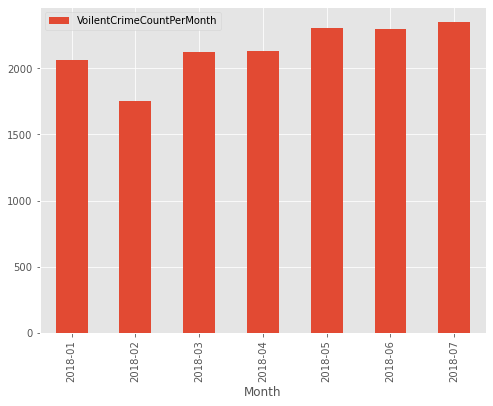

In [18]:
x.plot.bar(x='Month', y='VoilentCrimeCountPerMonth')

                   Graph1: Month v/s VoilentCrimes

In the television documentary “Ross Kemp and the Armed Police" the first claim is <b> "voilent crime is increasing".</b><p><b>From the above results (bar chart) clearly we can see that voilent crimes are increasing gradualy each month. </b><p><p>In the month of January'2018 the voilent crime counts are 2066.In the month of July'2018, 248 voilent crimes are increased.<p>
<h3>Reason behind use of visualization method</h3><p> If we have <b>comparative data</b> that you would like to represent through a chart then a <b>bar chart</b> would be the best option. In our scenario, we have <b>nominal plus time-series data</b>, so I am using a bar chart to visualize the solution.This type of chart is one of the more familiar options as it is easy to interpret.These charts are useful for displaying data that is classified into <b>nominal or ordinal categories</b>.     

In the below code code we are <b>GROUP BY Weapon crime count in each cities </b> by using <b>SQL</b> queries and creating data frame from that results.
<p>Using the function <b>sqlCtx.sql()</b> filtering the weapon crime count in each month with help of SQL queries.<p>

In [19]:
results = sqlCtx.sql("SELECT LSOAname, COUNT(*) AS WeaponCrimeCount FROM CrimeData WHERE  LSOAname !='' AND  CrimeType ='Possession of weapons' GROUP BY LSOAname ORDER BY WeaponCrimeCount DESC").collect()
WeaponCrimeCountInEachCity = sqlCtx.createDataFrame(results)
Top10_WeaponCrimeCountInEachCity = WeaponCrimeCountInEachCity.toPandas().head(10)
Top10_WeaponCrimeCountInEachCity

,LSOAname,WeaponCrimeCount
0,Manchester,7
1,Dacorum,6
2,Calderdale,6
3,Birmingham,5
4,Bolton,5
5,Uttlesford,5
6,Southwark,5
7,Liverpool,4
8,Broxbourne,4
9,Sheffield,4


<p>Below code, Loading <b> population data </b> set from local file system using <b>sc.textfile()</b>, and checking wether file loaded properly by using <b>lines.take()</b><p>

<h3>Data Loading<h3>

In [20]:
lines = sc.textFile("file:///Users/alanj/Desktop/LSOA_Population.csv")
lines.take(5)

['date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value',
 '2011,Darlington ,E01012334,Total,2466,1220,1246,2466,0,42,6033.58,0.4',
 '2011,Darlington ,E01012335,Total,1383,682,701,1383,0,21,114.01,12.1',
 '2011,Darlington ,E01012366,Total,2008,972,1036,2008,0,30,6718.16,0.3',
 '2011,Darlington ,E01033481,Total,1364,680,684,1350,14,21,146.95,9.3']

<p> In the below code we're defining a <b> parseline() function</b> and <b>passing line as an argument to the parseline function.</b><p>
<p><b>fields = line.split(',')</b> will split all the records into readable rows and columns<p>
<p> the rest of the line will read each attribute in our dataset and assign them to a particular field <p>

<h3>Component Selection and Data Pipeline Implementation<h3>

In [21]:
def parseline(line):
    fields = line.split(',')
    Date = fields[0]
    Geography = fields[1]
    GeographyCode = fields[2]
    RuralUrban = fields[3]
    AllUsualResidents = int(fields[4])
    Males = int(fields[5])
    Females = int(fields[6]) 
    LivesInHouseHold = fields[7]
    LivesInCommunalEst = fields[8]
    SchoolChild = fields[9]
    Area = fields[10]
    Density = fields[11]
    return (Geography,GeographyCode,AllUsualResidents,Males,Females,LivesInHouseHold,Area,Density)


<p>Below code, Extracting header from the given data set by using the <b>filter()</b> function<p>

In [22]:
header = lines.first() 
justdata = lines.filter(lambda row: row != header)

Passing an attribute parseline into <b>.map()</b> method to generate RDD
Resilient Distributed Datasets (RDD) is a fundamental data structure of Spark.

In [23]:
rdd_location = justdata.map(parseline)

In [24]:
print(rdd_location.count())

34753


<p>Creating dataFrame by passing the <b> argument rdd_location</b> in the <b>.createDataFrame()</b> method.<p>
<b>Notes:</b> A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column.

In [25]:
df_location = sqlCtx.createDataFrame(rdd_location, ['Geography','GeographyCode','AllUsualResidents','Males','Females','LivesInHouseHold','Area','Density'])

<p>Below code, converting our existing <b> Dataframes</b> into <b> Pandas Dataframes</b>

In [26]:
df_location.toPandas().head(10)

,Geography,GeographyCode,AllUsualResidents,Males,Females,LivesInHouseHold,Area,Density
0,Darlington,E01012334,2466,1220,1246,2466,6033.58,0.4
1,Darlington,E01012335,1383,682,701,1383,114.01,12.1
2,Darlington,E01012366,2008,972,1036,2008,6718.16,0.3
3,Darlington,E01033481,1364,680,684,1350,146.95,9.3
4,Darlington,E01033482,1621,810,811,1621,234.31,6.9
5,Darlington,E01012323,1563,799,764,1563,55.47,28.2
6,Darlington,E01012324,1399,671,728,1399,20.68,67.6
7,Darlington,E01032545,1259,631,628,1257,36.06,34.9
8,Darlington,E01032546,1776,886,890,1775,93.82,18.9
9,Darlington,E01012328,1571,768,803,1571,25.72,61.1


In the below code code we are <b>GROUP BY Population in each cities </b> by using <b>SQL</b> queries and creating data frame from that results.
<p>Using the function <b>sqlCtx.sql()</b> filtering the population in each cities with help of SQL queries.<p>

<h3>Data Extraction and Filtering <h3>

In [27]:
df_location.registerTempTable("LocationData")
results = sqlCtx.sql("SELECT LocationData.Geography,SUM (AllUsualResidents) AS TotalPopulation  FROM LocationData GROUP BY Geography ORDER BY TotalPopulation  DESC").collect()
PopulationInEachCity = sqlCtx.createDataFrame(results)
PopulationInEachCity.toPandas().head(10)


,Geography,TotalPopulation
0,Birmingham,1073045
1,Leeds,751485
2,Sheffield,552698
3,Cornwall,532273
4,Bradford,522452
5,County Durham,513242
6,Manchester,503127
7,Wiltshire,470981
8,Liverpool,466415
9,Bristol,428234


<p>In the above table, We can see the citywide population.<p>In the television documentary “Ross Kemp and the Armed Police" the second claim is <b> There are more firearm incidents per head in Birmingham than anywhere else in the UK.</b>To Analyse that claim, filtering citywide population.

In [28]:
df_location.registerTempTable("LocationData")
results = sqlCtx.sql("SELECT LocationData.Geography AS LSOAname,SUM (AllUsualResidents) AS TotalPopulation  FROM LocationData WHERE (Geography ='Manchester ' OR Geography ='Dacorum ' OR Geography ='Calderdale '  OR Geography ='Birmingham' OR Geography ='Bolton ' OR Geography ='Uttlesford ' OR Geography ='Southwark ' OR Geography ='Liverpool ' OR Geography ='Broxbourne ' OR Geography ='Sheffield ' ) GROUP BY Geography ORDER BY TotalPopulation  DESC").collect()
PopulationInEachCity = sqlCtx.createDataFrame(results)
top10_PopulationInEachCity = PopulationInEachCity.toPandas().head(10)
top10_PopulationInEachCity

,LSOAname,TotalPopulation
0,Birmingham,1073045
1,Sheffield,552698
2,Manchester,503127
3,Liverpool,466415
4,Southwark,288283
5,Bolton,276786
6,Calderdale,203826
7,Dacorum,144847
8,Broxbourne,93609
9,Uttlesford,79443


<p> We then merge the two pandas data frame by taking <b> LSOAname as the key</b>. This enables us to divide the <b>WeaponCrimeCount Column </b> and the <b>TotalPopulation column</b> to give us the <b> CrimePerHead </b> in each cities.
<p>Merging action is performed by using <b>pd.merge()</b> method.<p>
    
<p><b>Firearm Crime per head = total firearm crime in city A / total population in city A</b><p>

In [29]:
WeaponCrime_Population = pd.merge(Top10_WeaponCrimeCountInEachCity, top10_PopulationInEachCity, on = 'LSOAname')
WeaponCrime_Population['CrimePerHead'] = (Top10_WeaponCrimeCountInEachCity['WeaponCrimeCount']/top10_PopulationInEachCity['TotalPopulation'])
WeaponCrime_Population

,LSOAname,WeaponCrimeCount,TotalPopulation,CrimePerHead
0,Manchester,7,503127,0.000007
1,Dacorum,6,144847,0.000011
2,Calderdale,6,203826,0.000012
3,Birmingham,5,1073045,0.000011
4,Bolton,5,276786,0.000017
5,Uttlesford,5,79443,0.000018
6,Southwark,5,288283,0.000025
7,Liverpool,4,466415,0.000028
8,Broxbourne,4,93609,0.000043
9,Sheffield,4,552698,0.000050


Sorting the above results in descending order by using <b>.sort_values()</b> method.

In [30]:
x = WeaponCrime_Population.sort_values(by='CrimePerHead', ascending=False)
x.style.format({}).bar(subset=["CrimePerHead"], color='lightgreen')

,LSOAname,WeaponCrimeCount,TotalPopulation,CrimePerHead
9,Sheffield,4,552698,0.000050
8,Broxbourne,4,93609,0.000043
7,Liverpool,4,466415,0.000028
6,Southwark,5,288283,0.000025
5,Uttlesford,5,79443,0.000018
4,Bolton,5,276786,0.000017
2,Calderdale,6,203826,0.000012
1,Dacorum,6,144847,0.000011
3,Birmingham,5,1073045,0.000011
0,Manchester,7,503127,0.000007


In the television documentary “Ross Kemp and the Armed Police" the second claim is <b> There are more firearms incidents per head in Birmingham than anywhere else in the UK.</b><p>From the above result we can clearly see that <b>, Sheffield, Broxbourne  have the highest rate of firearms crime per head in the UK</b> <p> 

In [31]:
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,6)

<h3>Data Visualization<h3>

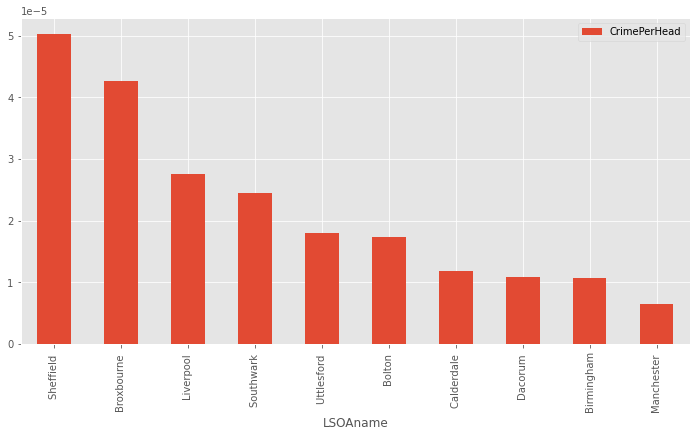

In [32]:
x.plot.bar(x='LSOAname', y='CrimePerHead')

                         Graph2: Firearm incidents per head v/s Cities 

In the television documentary “Ross Kemp and the Armed Police" the second claim is <b> There are more firearms incidents per head in Birmingham than anywhere else in the UK.</b><p>From the above bar chart we can clearly see that <b>Sheffield, Broxbourne </b> have the highest rate of firearms crime per head in the UK. <p> <b>We can conclude that the second claim is false according to the 2018 subset crime data set.</b><p>Sheffield recorded (0.000050) followed by Broxbourne(0.000043) has highest rate of firearm crimes. Birmingham only recorded (0.000011) lower rate of firearm crimes compared with Sheffield,Broxbourne etc..<p>

In the below code code we are <b>GROUP BY WeaponCrimeCount in each cities </b> by using <b>SQL</b> queries and creating data frame from that results.
<p>Using the function <b>sqlCtx.sql()</b> filtering the WeaponCrimeCount in each cities with help of SQL queries.<p>

<h3>Reason behind use of visualization method</h3><p> If we have <b>ordinal data</b> that you would like to represent through a chart then a <b>bar chart</b> would be the best option. In our scenario, we have <b>ordinal data</b>, so I am using a bar chart to visualize the solution.This type of chart is one of the more familiar options as it is easy to interpret.These charts are useful for displaying data that is classified into <b>nominal or ordinal categories</b>.

<h3>Data Extraction and Filtering <h3>

In [ ]:
results = sqlCtx.sql("SELECT LSOAname, COUNT(*) AS WeaponCrimeCount FROM CrimeData WHERE  LSOAname !='' AND  CrimeType ='Possession of weapons' GROUP BY LSOAname ORDER BY WeaponCrimeCount DESC").collect()
WeaponCrimeCountInEachCity = sqlCtx.createDataFrame(results)
Top_WeaponCrimeCountInEachCity = WeaponCrimeCountInEachCity.toPandas()
Top_WeaponCrimeCountInEachCity

In the below code code we are <b>GROUP BY DrugsCrimeCount in each cities </b> by using <b>SQL</b> queries and creating data frame from that results.
<p>Using the function <b>sqlCtx.sql()</b> filtering the DrugsCrimeCount in each cities with help of SQL queries.<p>

In [34]:
results = sqlCtx.sql("SELECT LSOAname, COUNT(*) AS DrugsCrimeCount FROM CrimeData WHERE  LSOAname !='' AND  CrimeType ='Drugs' GROUP BY LSOAname ORDER BY DrugsCrimeCount DESC").collect()
DrugsCrimeCountInEachCity = sqlCtx.createDataFrame(results)
Top_DrugsCrimeCountInEachCity = DrugsCrimeCountInEachCity.toPandas()
Top_DrugsCrimeCountInEachCity

,LSOAname,DrugsCrimeCount
0,Liverpool,27
1,Leeds,16
2,Croydon,14
3,Newcastle upon Tyne,13
4,Birmingham,12
...,...,...
238,Medway,1
239,Darlington,1
240,Eastleigh,1
241,Mid Devon,1


<p> We then merge the two pandas data frame by taking <b> LSOAname as the key</b>. 
This enables us to check the correlation between firearm crime and drugs.
we are merging two  data frames <b>Top_WeaponCrimeCountInEachCity + Top_DrugsCrimeCountInEachCity.</b>
<p>Merging action is performed by using <b>pd.merge()</b> method.<p>

In [35]:
WeaponCrime_Drugs = pd.merge(Top_WeaponCrimeCountInEachCity, Top_DrugsCrimeCountInEachCity, on = 'LSOAname')
WeaponCrime_Drugs

,LSOAname,WeaponCrimeCount,DrugsCrimeCount
0,Manchester,7,6
1,Dacorum,6,5
2,Calderdale,6,1
3,Birmingham,5,12
4,Bolton,5,4
...,...,...,...
99,St Edmundsbury,1,1
100,York,1,1
101,Eastleigh,1,1
102,Knowsley,1,2


In [36]:
import numpy as np
from pyspark.mllib.stat import Statistics
import seaborn as sns

<p>In the television documentary “Ross Kemp and the Armed Police" the third claim is <b>"Crimes involving firearms are closely associated with drugs offenses" </b> To analyse the correlation between Drugs and Firearm crimes, we are calculating the correlation coefficient. The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0.<br>
<b>1.0  = strong +ve correlation between two variables(directly proportional each other)<br>
<b>-1.0 = strong -ve correlation between two variables(in-directly proportional each other)<br>
<b> 0.0 = zero correlation between two variables.</b><p>

In [37]:
WeaponCrime_Drugs.corr()

,WeaponCrimeCount,DrugsCrimeCount
WeaponCrimeCount,1.000000,0.325664
DrugsCrimeCount,0.325664,1.000000


From the above results, we can see that the correlation between weapon crime and drugs is <b> 0.325664  A weak uphill (positive) linear relationship. </b> That means a moderate amount of firearm crimes are directly involved with drug usage.

<p><b>Correlation coefficients</b> are indicators of the strength of the relationship between two different variables. A correlation coefficient that is greater than zero indicates a positive relationship between two variables. A value that is less than zero signifies a negative relationship between two variables.The value of the correlation coefficient varies between +1 and -1<p>
<p>Seaborn is a Python data visualization library based on matplotlib.<p>
<p> In the below code, plotting the correlation between <b>Drugs and Weapon crimes</b> by using the <b>sns.heatmap()</b> function.

<h3>Data Visualization<h3>

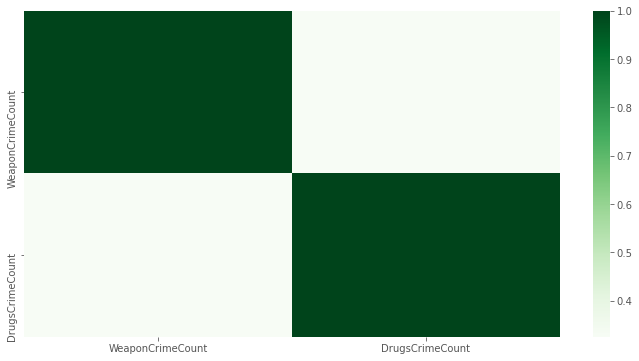

In [38]:
sns.heatmap(WeaponCrime_Drugs.corr(), cmap="Greens")

                     Graph3: Firearm crimes v/s Drugs Usage

From the above results, we can see that the correlation between weapon crime and drugs is <b> 0.325664  A weak uphill (positive) linear relationship.<p> </b> That means <b>moderate amont of firearm crimes are direclty involved with the drugs usage.</b><p>

<h3>Reason behind use of visualization method</h3>
<p>Different types of graphs are<b> available to plot the relationship between two variables.</b> Example <b>Scatter chart, Heatmap</b>, etc..
In this scenario, I am using Heatmaps. Heatmaps are used to show relationships between two variables, one plotted on each axis. 
By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.<p>

<h3>Reason behind use of statistical method</h3><p>According to the above scenario, We have to find the relationship between crimes involving firearms v/s Drugs usage.So I am using the correlation coefficient to find the relationship between these two variables.Correlation coefficients are indicators of the strength of the relationship between two different variables. A correlation coefficient that is greater than zero indicates a positive relationship between two variables. A value that is less than zero signifies a negative relationship between two variables.<p>

<h1>EVALUATION AND CONCLUSION</h1>

<p> In the television documentary “Ross Kemp and the Armed Police” broadcast on 6th September 2018 by ITV, 
multiple claims were made regarding violent crime in the UK. </p>

These claims were:
1.	Violent Crime is increasing
2.	There are more firearms incidents per head in Birmingham than anywhere else in the UK
3.	Crimes involving firearms are closely associated with drugs offenses

After the investigation, I am come up with the following conclusions.

<p> <p>
<img src="files/image1.png" width='300' height='300' style="float:left">
1. The first claim(<b>The violent crime is increasing</b>) is correct according to the dataset(<b>2018 subset crime</b>). From our analysis we can observe that violent crimes are increasing gradually in the UK. In the month of January'2018, the violent crime counts are 2066. In the month of July'2018, 248 violent crimes are increased.
<p><span style="color:red">Please refer Graph1: Month v/s VoilentCrimes</span><p>
    

2. The second claim(<b>There are more firearms incidents per head in Birmingham than anywhere else in the UK</b>) is incorrect, according to the dataset(<b>2018 subset crime</b>). From the above analysis we can clearly see that <b>Sheffield, Broxbourne </b> have the highest rate of firearms crime per head in UK.<b>We can conclude that the second claim is false according to the 2018 subset crime data set.</b><p><b>Sheffield recorded (0.000050) followed by Broxbourne(0.000043) has highest rate of firearm crimes</b>. Birmingham only recorded (0.000011) lower rate of firearm crimes compared with Sheffield, Broxbourne, etc..<p><p>From the above analysis we can conclude that <b>Sheffield, Broxbourne  have the highest rate of firearms crime per head in the UK</b><p>
<p><span style="color:red"> Please refer  Graph2: Firearm incidents per head v/s Cities</span><p>
<img src="files/image2.png" width='400' height='300'>

3. The third claim(<b>Crimes involving firearms are closely associated with drugs offenses</b>) is correct according to the dataset(<b>2018 subset crime</b>). From the above analysis, we can see that the correlation between weapon crime and drugs is <b> 0.325664  A weak uphill (positive) linear relationship. </b> That means <b>moderate amount of firearm crimes are directly involved with drug usage.</b>
<p><span style="color:red"> Please refer Graph3: Firearm crimes v/s Drugs Usage</span><p>
<img src="files/image3.png" width='400' height='300'>

<p>After the detailed analysis we can conclude that first and third claims are true, Second claim is false<p>
    
    


<b> References </b>

1. English indices of deprivation 2018: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019
2. Data.police.uk 2018 https://data.police.uk/
3. Postcodes: https://www.freemaptools.com/download-uk-postcode-lat-lng.htm
4. Pyspark Documentation: https://spark.apache.org/docs/latest/api/python/index.html
5. Python Documentation: https://docs.python.org/3.9/
6. SQL Documentation: https://dev.mysql.com/doc/
7. Pandas Documentation: https://pandas.pydata.org/docs/
8. Matplotlib Documentation: https://matplotlib.org/3.3.3/contents.html
9. Stackoverflow: https://stackoverflow.com/
10. Jupyter Notebook Markdown: https://jupyter-notebook.readthedocs.io/en/stable/
